In [145]:
import pandas as pd

In [146]:
data=pd.read_csv("Advertising.csv")

In [147]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [148]:
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [149]:
data.shape

(200, 5)

In [150]:
import seaborn as sns
%matplotlib inline

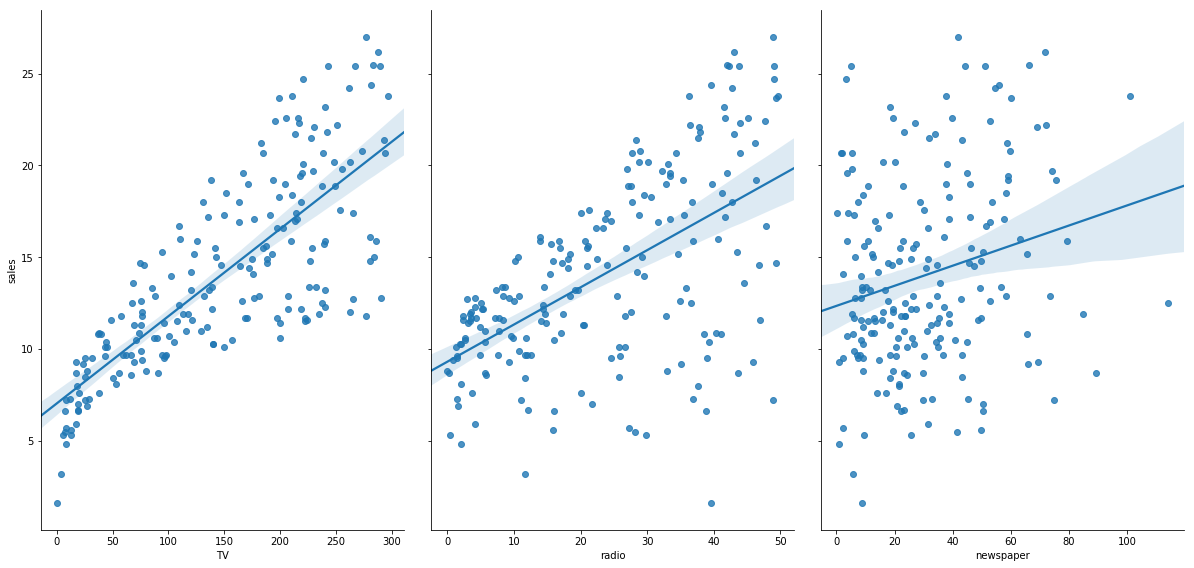

In [151]:
 sns.pairplot(data,x_vars=["TV","radio","newspaper"],y_vars="sales",size=8, aspect=0.7,kind="reg")

In [152]:
#preprocess
feature_cols=["TV","radio","newspaper"]
X= data[feature_cols]
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [153]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [154]:
y=data["sales"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [155]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [156]:
#Spliting the x and y into training and the testing dataset
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=1)

In [157]:
#view th split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [158]:
#build linear regression model
from sklearn.linear_model import LinearRegression 
#instantiate the model
linreg = LinearRegression()

In [159]:
#fit the model
#provide the linear dataset
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [160]:
#interpreting various coefficient of the model
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [161]:
#pair the feature names with the coefficient
list(zip(feature_cols,linreg.coef_))

[('TV', 0.04656456787415028),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804347)]

In [162]:
#make predictions predict the testing dataset
y_pred=linreg.predict(X_test)

In [163]:
#compute RMSE for sales prediction
import numpy as np
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.4046514230328955


3.210929707703542
[30.92669764]


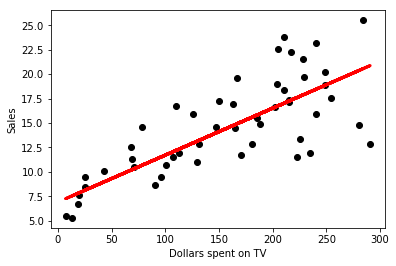

In [169]:
#feature extraction to decrese RMSE-- take only req feature
import matplotlib.pyplot as plt
from sklearn import linear_model
feature=["TV","radio"]
X1=data[["TV"]]
y1=data["sales"]
X1_train,X1_test,y1_train,y1_test =train_test_split(X1,y1,random_state=1)
linreg=LinearRegression()
linreg.fit(X1_train,y1_train)
y_pred=linreg.predict(X1_test)
print(np.sqrt(metrics.mean_squared_error(y1_test,y_pred)))


#plotting
#view th split
#print(X1_train.iloc[:,0])
#print(X1_test.shape)
#print(y1_train.shape)
#print(y1_test.shape)
plt.scatter(X1_test.iloc[:,0], y1_test,  color='black')
plt.xlabel("Dollars spent on TV")
plt.ylabel("Sales")
plt.plot(X1_test, linreg.predict(X1_test), color='red',linewidth=3)
print( str((linreg.predict(500))) )


3.7184061815421234


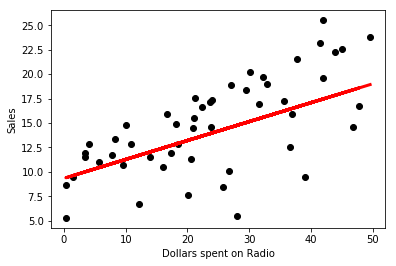

In [170]:
X1=data[["radio"]]
y1=data["sales"]
X1_train,X1_test,y1_train,y1_test =train_test_split(X1,y1,random_state=1)
linreg=LinearRegression()
linreg.fit(X1_train,y1_train)
y_pred=linreg.predict(X1_test)

print(np.sqrt(metrics.mean_squared_error(y1_test,y_pred)))


#plotting
#view th split
#print(X1_train.iloc[:,0])
#print(X1_test.shape)
#print(y1_train.shape)
#print(y1_test.shape)
plt.scatter(X1_test.iloc[:,0], y1_test,  color='black')
plt.xlabel("Dollars spent on Radio")
plt.ylabel("Sales")
plt.plot(X1_test, linreg.predict(X1_test), color='red',linewidth=3)


In [167]:
print( str((linreg.predict(50))) )


[19.00807904]
